# Image Processing in Ruby

## Hough Transform

In this notebook, we will use the Hough Transform to detect lines in images.

The algorithm was implemented in Ruby and is part of the *image_processing* gem.

The *image_processing* gem was created just for educational purposes. It uses the *libvips: an image processing library*, adding some convenient methods to present concepts like *thresholding*, *mathematical morphology*, *feature extraction* and more.

### Setup

The first step is to import the *image_processing* gem.

In [1]:
require 'image_processing'

true

And to be able to visualize images in Jupyter, let's create a display method:

In [2]:
require 'rmagick'

module Vips
  class Image
    def display
      @fname ||= "/tmp/vips_image_#{Time.now.to_i}.jpg"
      write_to_file(@fname)
      IRuby.display(Magick::Image.read(@fname)[0])
    end
  end
end

:display

### Loading the image

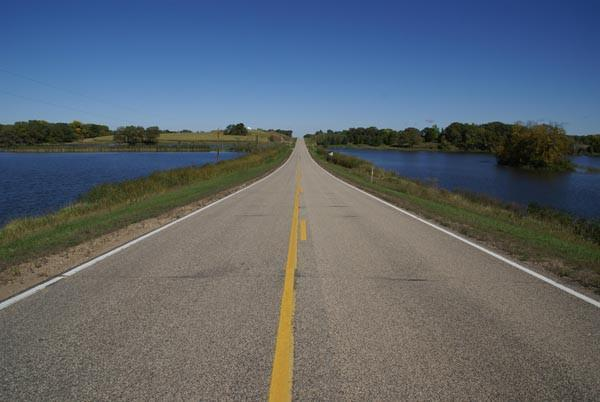

#<CZTop::Socket::PUB:0x21c5dc0 last_endpoint="tcp://127.0.0.1:45589">

In [3]:
image = Vips::Image.new_from_file('../../samples/lane.jpg')
image.display

### Image pre-processing

In [4]:
grey = image.to_greyscale

#<Vips::Image:0x165f620 ptr=0x2aba1a0>

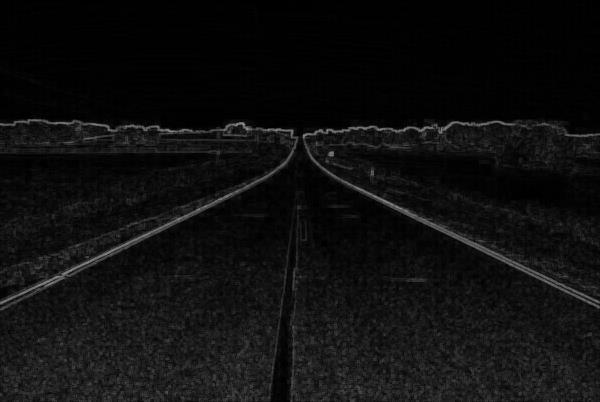

#<CZTop::Socket::PUB:0x21c5dc0 last_endpoint="tcp://127.0.0.1:45589">

In [5]:
gradient = ImageProcessing::Morphology.gradient(grey)
gradient.display

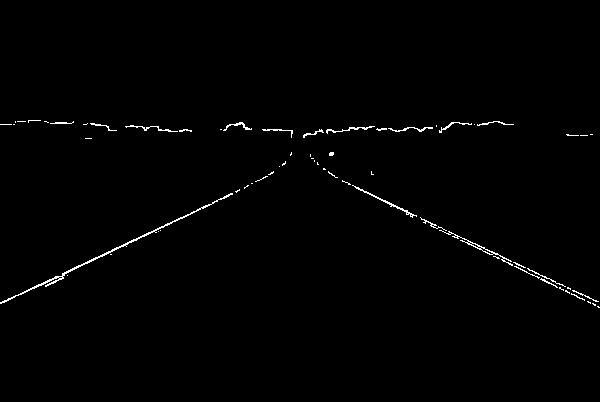

#<CZTop::Socket::PUB:0x21c5dc0 last_endpoint="tcp://127.0.0.1:45589">

In [6]:
gradient = gradient.threshold(grey.percent(30))
gradient.display

### Detecting lines

In [7]:
lines = ImageProcessing::HoughTransform.new(gradient).find_lines(threshold: 35)

lines.each { |line| puts line }; puts ''

{:rho=>274.0, :theta=>0.43633231299858233, :intersections=>236}
{:rho=>20.0, :theta=>-0.43633231299858233, :intersections=>210}
{:rho=>274.0, :theta=>0.45378560551852587, :intersections=>186}
{:rho=>13.0, :theta=>-0.45378560551852565, :intersections=>163}
{:rho=>275.0, :theta=>0.45378560551852587, :intersections=>156}
{:rho=>11.0, :theta=>-0.45378560551852565, :intersections=>146}
{:rho=>273.0, :theta=>0.43633231299858233, :intersections=>139}
{:rho=>4.0, :theta=>-0.47123889803846897, :intersections=>135}
{:rho=>273.0, :theta=>0.45378560551852587, :intersections=>133}
{:rho=>3.0, :theta=>-0.47123889803846897, :intersections=>132}
{:rho=>275.0, :theta=>0.43633231299858233, :intersections=>125}
{:rho=>12.0, :theta=>-0.45378560551852565, :intersections=>114}
{:rho=>5.0, :theta=>-0.47123889803846897, :intersections=>112}
{:rho=>14.0, :theta=>-0.45378560551852565, :intersections=>110}
{:rho=>130.0, :theta=>0.0, :intersections=>110}
{:rho=>2.0, :theta=>-0.47123889803846897, :intersections=>1

In [8]:
result = image.draw_lines([0.0, 0.0, 255.0], lines.take(10))

#<Vips::Image:0x15c93c8 ptr=0x41327e0>

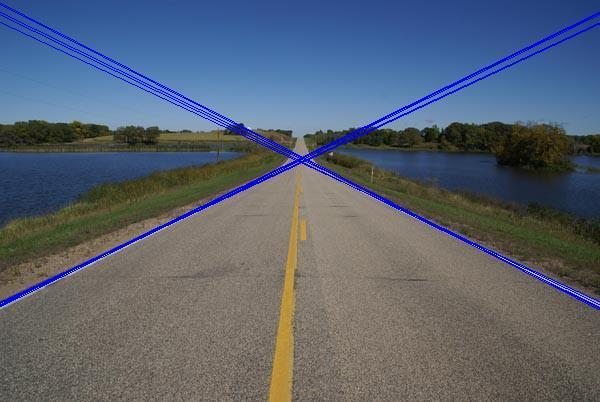

#<CZTop::Socket::PUB:0x21c5dc0 last_endpoint="tcp://127.0.0.1:45589">

In [9]:
result.display